# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *


[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [1]:
# <Student to fill this section>
# Pandas for data handling
import pandas as pd
import numpy as np
import re

# Scikit Learn for ML training
import sklearn
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pointbiserialr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


import seaborn as sns
import matplotlib.pyplot as plt

#my own functions 
import my_utils_new as my_utils
from my_utils_new import missing_col, get_numerical_and_categorical_columns, parse_height


---
## A. Project Description


In [20]:
# <Student to fill this section>
student_name = "SZU-YU LIN"
student_id = "25235490"
group_id = "5"

In [21]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [22]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [23]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [24]:
# <Student to fill this section>
business_use_case_description = """
To help NBA teams make informed decisions about the college players selection process, we will analyze the performance of college players in the NBA draft. The goal is to identify key factors that contribute to a player's success in the NBA, such as points per game, assists, rebounds, and other relevant statistics. By understanding these factors, teams can make data-driven decisions when selecting players for their roster.
"""

In [25]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [26]:
# <Student to fill this section>
business_objectives = """
1. Analyze the performance of college players in the NBA draft to identify key factors contributing to success.
2. Provide insights to NBA teams for making data-driven decisions in player selection.
3. Develop a predictive model to estimate a player's potential success in the NBA based on college performance by utilising the random forest regressor.
4. Create visualizations to communicate findings effectively to stakeholders.
5. Ensure the model is robust and generalizes well to unseen data.
6. The data performed well in the random forest algorithm.
7. The measure metrics for the model is AUROC. 
"""

In [27]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [28]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
1. NBA Teams: Expect data-driven insights to enhance player selection strategies.
2. Coaches: Seek performance metrics to evaluate player potential and fit within team dynamics.
3. Analysts: Require clear visualizations and statistical analyses to support decision-making processes.
4. Fans: Anticipate engaging content that highlights player performance and potential impact on the league
"""

In [29]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [31]:
# Load the dataset
test = pd.read_csv('/Users/tifflin/Desktop/UTS/MS data science and innovation/3rd SEM/36120 Advanced ML/ASM1/AT1-Group5/36120-AT1-Group5/25605217/data/raw/test.csv')
# Display the first few rows and basic information about the dataset
print("Dataset Shape:", test.shape)
print("\nFirst few rows of the dataset:")
display(test.head())
print("\nDataset Info:")
display(test.info())

Dataset Shape: (1297, 61)

First few rows of the dataset:


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,UC Davis,BW,8,2.2,51.7,13.4,30.0,30.00,0.0,14.3,...,-11.240100,-4.721030,0.1000,0.6000,0.7000,0.2000,0.1000,0.0000,1.5000,c6d3ce49-28b6-4756-8061-b2bd68730c52
1,Campbell,BSth,25,16.4,85.0,25.2,50.0,52.10,2.0,11.8,...,-2.972020,-1.741870,0.1481,0.9259,1.0741,0.1481,0.4074,0.1111,4.0741,24dd0ae2-9d22-4d31-9cb6-c31f58f903b5
2,Weber St.,BSky,29,50.5,117.8,16.8,61.8,59.77,12.3,17.1,...,0.739055,-0.259202,2.1562,2.7500,4.9062,0.7188,0.4062,1.0625,6.7500,0cf3e822-9446-4285-b7ed-7c19d8e976fe
3,Ohio,MAC,17,14.9,85.8,13.1,34.9,34.88,5.1,13.7,...,-3.339750,-0.573442,0.5789,1.5789,2.1579,0.5263,0.1579,0.1579,2.6842,b1a88de0-6852-4597-bb92-9164b40758e5
4,New Mexico St.,WAC,26,17.1,85.8,10.8,48.1,49.46,5.6,17.4,...,-4.184970,1.718210,0.4643,1.1429,1.6071,0.1071,0.0714,0.4286,1.7500,97c327ce-d051-40f0-9166-1a43557c3c92



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 61 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 1297 non-null   object 
 1   conf                 1297 non-null   object 
 2   GP                   1297 non-null   int64  
 3   Min_per              1297 non-null   float64
 4   Ortg                 1297 non-null   float64
 5   usg                  1297 non-null   float64
 6   eFG                  1297 non-null   float64
 7   TS_per               1297 non-null   float64
 8   ORB_per              1297 non-null   float64
 9   DRB_per              1297 non-null   float64
 10  AST_per              1297 non-null   float64
 11  TO_per               1297 non-null   float64
 12  FTM                  1297 non-null   int64  
 13  FTA                  1297 non-null   int64  
 14  FT_per               1297 non-null   float64
 15  twoPM                12

None

Check missing value by each feature

In [ ]:
print(missing_col(test))

['ht', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio']


,0
ht,6
Rec_Rank,894
ast_tov,125
rimmade,61
rimmade_rimmiss,61
midmade,61
midmade_midmiss,61
rim_ratio,178
mid_ratio,196
dunksmade,61


In [ ]:
# Create a DataFrame with missing values information
missing_values = pd.DataFrame({
    'Column': test.columns,
    'Missing Values': test.isnull().sum(),
    'Percentage Missing': (test.isnull().sum() / len(test) * 100).round(2)
})

# Sort by number of missing values in descending order
missing_values = missing_values.sort_values('Missing Values', ascending=False)

# Display all rows
pd.set_option('display.max_rows', None)
print("Total number of features:", len(test.columns))
display(missing_values)

Total number of features: 61


,Column,Missing Values,Percentage Missing
Rec_Rank,Rec_Rank,894,68.93
dunks_ratio,dunks_ratio,738,56.90
mid_ratio,mid_ratio,196,15.11
rim_ratio,rim_ratio,178,13.72
ast_tov,ast_tov,125,9.64
rimmade,rimmade,61,4.70
rimmade_rimmiss,rimmade_rimmiss,61,4.70
midmade,midmade,61,4.70
midmade_midmiss,midmade_midmiss,61,4.70
dunksmade,dunksmade,61,4.70


In [ ]:
# Load the training dataset
train = pd.read_csv('/Users/tifflin/Desktop/UTS/MS data science and innovation/3rd SEM/36120 Advanced ML/ASM1/AT1-Group5/36120-AT1-Group5/25605217/data/raw/train.csv')

# Display the first few rows and basic information about the dataset
print("Dataset Shape:", train.shape)
print("\nFirst few rows of the dataset:")
display(train.head())
print("\nDataset Info:")
display(train.info())

Dataset Shape: (14774, 62)

First few rows of the dataset:


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,Pacific,BW,26,52.6,111.8,19.3,61.8,64.93,1.1,7.5,...,-1.34201,0.2308,1.5769,1.8077,2.2308,0.6538,0.0769,9.6538,681edf6e-41cb-4fd1-ba91-da573e063fbc,0.0
1,Mississippi,SEC,2,0.8,63.6,29.6,33.3,33.33,0.0,21.5,...,-5.42104,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,3542dcb7-19ad-47f2-8b3a-eb79eb3ec4c4,0.0
2,Stephen F. Austin,Slnd,4,0.6,61.4,21.7,50.0,50.00,0.0,0.0,...,6.46650,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.5000,ca0d8700-807d-4fce-a7a9-63922d1981e6,0.0
3,Virginia,ACC,28,59.2,88.2,21.7,46.2,47.25,1.5,9.7,...,1.45913,0.3214,2.0357,2.3571,3.0000,1.2857,0.0714,7.7500,01285c6b-bc71-4fa8-941a-28cf3976a117,0.0
4,Elon,SC,21,13.7,47.5,15.0,26.2,26.20,5.8,2.3,...,-3.75694,0.3810,0.1429,0.5238,0.4286,0.1905,0.0000,0.5714,a962c41c-55ff-461e-8585-db32e4fa0580,0.0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14774 entries, 0 to 14773
Data columns (total 62 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14774 non-null  object 
 1   conf                 14774 non-null  object 
 2   GP                   14774 non-null  int64  
 3   Min_per              14774 non-null  float64
 4   Ortg                 14774 non-null  float64
 5   usg                  14774 non-null  float64
 6   eFG                  14774 non-null  float64
 7   TS_per               14774 non-null  float64
 8   ORB_per              14774 non-null  float64
 9   DRB_per              14774 non-null  float64
 10  AST_per              14774 non-null  float64
 11  TO_per               14774 non-null  float64
 12  FTM                  14774 non-null  int64  
 13  FTA                  14774 non-null  int64  
 14  FT_per               14774 non-null  float64
 15  twoPM                

None

**Check missing value by each feature on train set**

In [ ]:
print(missing_col(train))

['ht', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']


,0
ht,8
Rec_Rank,9885
ast_tov,1535
rimmade,2075
rimmade_rimmiss,2075
midmade,2075
midmade_midmiss,2075
rim_ratio,3203
mid_ratio,3191
dunksmade,2075


In [ ]:
# Create a DataFrame with missing values information
missing_values = pd.DataFrame({
    'Column': train.columns,
    'Missing Values': train.isnull().sum(),
    'Percentage Missing': (train.isnull().sum() / len(train) * 100).round(2)
})

# Sort by number of missing values in descending order
missing_values = missing_values.sort_values('Missing Values', ascending=False)

# Display all rows
pd.set_option('display.max_rows', None)
print("Total number of features:", len(train.columns))
display(missing_values)

Total number of features: 62


,Column,Missing Values,Percentage Missing
Rec_Rank,Rec_Rank,9885,66.91
dunks_ratio,dunks_ratio,9388,63.54
rim_ratio,rim_ratio,3203,21.68
mid_ratio,mid_ratio,3191,21.60
rimmade_rimmiss,rimmade_rimmiss,2075,14.04
midmade,midmade,2075,14.04
midmade_midmiss,midmade_midmiss,2075,14.04
dunksmade,dunksmade,2075,14.04
dunksmiss_dunksmade,dunksmiss_dunksmade,2075,14.04
rimmade,rimmade,2075,14.04


### Get numerical vs categorical columns

In [ ]:
print(get_numerical_and_categorical_columns(train))


Numeric columns : ['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'year', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'drafted']
Categorical columns : ['team', 'conf', 'yr', 'ht', 'type', 'player_id']


In [ ]:
test_numeric_cols, test_categorical_cols = get_numerical_and_categorical_columns(test)
print('Numeric columns :', test_numeric_cols)
print('Categorical columns :', test_categorical_cols)

Numeric columns : ['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'porpag', 'adjoe', 'pfr', 'year', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts']
Categorical columns : ['team', 'conf', 'yr', 'ht', 'type', 'player_id']


### C.2 Define Target variable

In [ ]:
# <Student to fill this section>
target_definition_explanations = """
The target variable 'drafted' indicates whether a college player was selected in the NBA draft. It is a binary variable where 1 represents a player who was drafted and 0 represents a player who was not drafted. This variable is crucial for our analysis as it allows us to evaluate the factors that contribute to a player's success in being drafted into the NBA.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [ ]:
# <Student to fill this section>

target = 'drafted'

### C.4 Explore Target variable

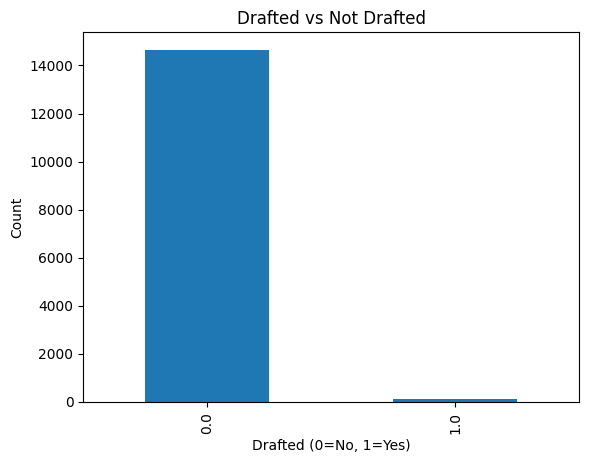

In [ ]:
# <Student to fill this section>
target_counts = train['drafted'].value_counts().sort_index()
plt.figure()
target_counts.plot.bar()
plt.title('Drafted vs Not Drafted')
plt.xlabel('Drafted (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
# <Student to fill this section>
target_distribution_explanations = """
the chart reveals a severe class imbalance in the target variable 'drafted'. The majority of players (approximately 90%) were not drafted, while only a small percentage (around 10%) were drafted. This imbalance can pose challenges for machine learning models, as they may become biased towards the majority class. It is esstial to use class wight balanced apply in the algo later to fix the issue.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest 'BPM`

In [ ]:
train_vs = train.copy()

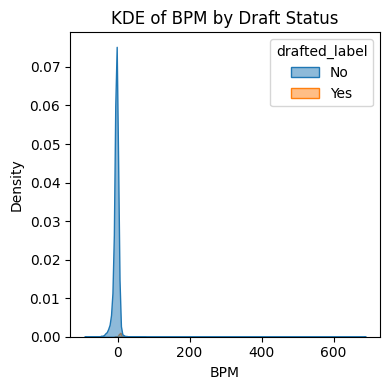

In [ ]:
# <Student to fill this section>

train_vs['drafted_label'] = train['drafted'].map({0:'No', 1:'Yes'})

plt.figure(figsize=(4,4))
sns.kdeplot(data=train_vs, x='bpm', hue='drafted_label', fill=True, alpha=0.5)
plt.title('KDE of BPM by Draft Status')
plt.xlabel('BPM')
plt.ylabel('Density')
plt.tight_layout()
plt.show()


In [ ]:
# <Student to fill this section>
feature_1_insights = """
the KDE plot shows the distribution of BPM (Box Plus/Minus) for drafted and non-drafted players. The drafted players tend to have higher BPM values, indicating better performance on the court. This suggests that BPM is a significant feature that can help differentiate between players who are drafted and those who are not.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `Min_per>`

     Min_per_bin  draft_rate
0  (-0.001, 2.5]    0.000000
1    (2.5, 12.4]    0.000340
2   (12.4, 28.0]    0.001356
3   (28.0, 48.3]    0.004398
4   (48.3, 94.3]    0.033898


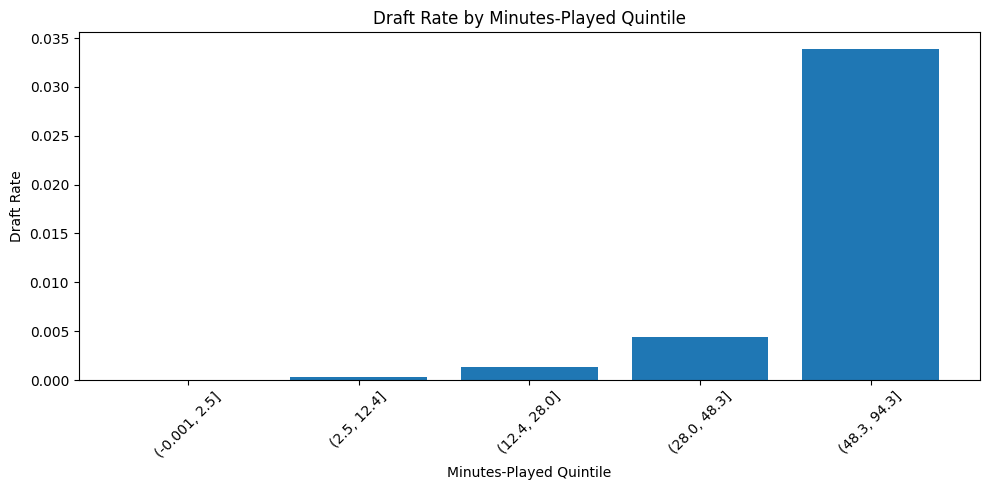

In [ ]:
# <Student to fill this section>
train_vs['Min_per_bin'] = pd.qcut(train['Min_per'], q=5, duplicates='drop')

# 3. Compute draft rate per bin
rate_by_bin = train_vs.groupby('Min_per_bin')['drafted'].mean().reset_index()
rate_by_bin.columns = ['Min_per_bin', 'draft_rate']

# 4. Display the rates as a table
print(rate_by_bin)

# 5. Plot draft rate by minutes-played bin
plt.figure(figsize=(10, 5))
plt.bar(rate_by_bin['Min_per_bin'].astype(str), rate_by_bin['draft_rate'])
plt.title('Draft Rate by Minutes-Played Quintile')
plt.xlabel('Minutes-Played Quintile')
plt.ylabel('Draft Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# <Student to fill this section>
feature_2_insights = """
The bar chart illustrates the draft rate for players based on their minutes played per game. Players in the highest quintile of minutes played have a significantly higher draft rate compared to those in lower quintiles. This suggests that playing time is a strong indicator of a player's potential to be drafted, as it reflects their performance and contribution to the team.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `\<put feature name here\>`


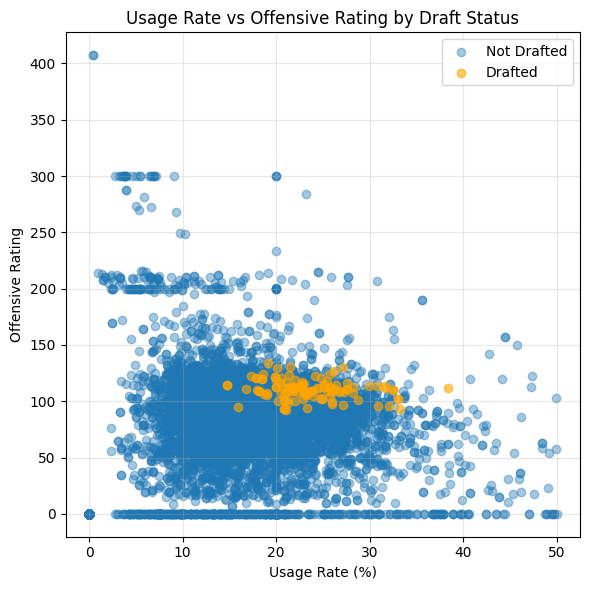

In [ ]:
# <Student to fill this section>
x_feat = 'usg'    # usage rate
y_feat = 'Ortg'   # offensive rating

# 3. Prepare two subsets
df_no  = train.loc[train['drafted']==0, [x_feat, y_feat]]
df_yes = train.loc[train['drafted']==1, [x_feat, y_feat]]

# 4. Plot
plt.figure(figsize=(6,6))
plt.scatter(df_no[x_feat],  df_no[y_feat],  alpha=0.4, label='Not Drafted')
plt.scatter(df_yes[x_feat], df_yes[y_feat], alpha=0.6, color='orange', label='Drafted')
plt.title('Usage Rate vs Offensive Rating by Draft Status')
plt.xlabel('Usage Rate (%)')
plt.ylabel('Offensive Rating')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# <Student to fill this section>
feature_n_insights = """
The scatter plot illustrates the relationship between Usage Rate and Offensive Rating for drafted and non-drafted players. Drafted players tend to have higher Usage Rates and Offensive Ratings, indicating that they are more involved in their team's offense and perform better overall. This suggests that both features are important indicators of a player's potential to be drafted into the NBA.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

### C.Bi-variate analysis

> Executing this analysis in case we need to use logistic regression for next experiment

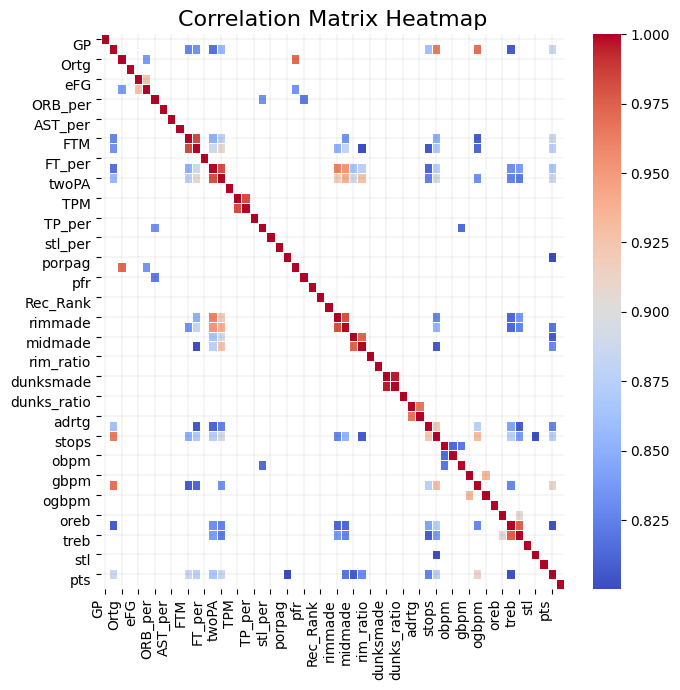

In [ ]:
plt.figure(figsize=(7,7))
correlation = train[train_numerical_columns].corr()
ax = sns.heatmap(correlation, mask = correlation < 0.8, linewidth=0.5, cmap='coolwarm')


ax.grid(True, which='both', axis='both', linestyle='-', linewidth=0.05, color='black')

# Adjust tick labels for better visibility
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, va='top')

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.tight_layout()  # Adjust layout to prevent cutting off labels or titles
plt.show()

---
## D. Feature Selection


### D.1 Approach "select all features"


In [ ]:
# <Student to fill this section>
feature_selection_1_insights = """
for the exprience 1, I will use all features available in the dataset. This approach allows us to identify potential relationships and patterns that may exist between the features and the target variable 'drafted'. By analyzing all features, we can gain a comprehensive understanding of the factors that contribute to a player's success in being drafted into the NBA.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

## D.z Final Selection of Features

i will drop the feature that contains players personal information such as name, team and player_id 

In [ ]:
#drop the feature that contains players personal information such as name, team and player_id, and year of study
train = train.drop(columns=['team', 'conf', 'yr'])
test = test.drop(columns=['team', 'conf',  'yr'])

In [ ]:
# <Student to fill this section>

features = train.columns.tolist()
features.remove(target)  # Remove the target variable from the features list
# Display the features
features_df = pd.DataFrame(features, columns=['Features'])
print("Total number of features:", len(features))

Total number of features: 58


In [ ]:
# <Student to fill this section>
feature_selection_explanations = """
for the exprience 1, I will use all features available in the dataset. This approach allows us to identify potential relationships and patterns that may exist between the features and the target variable 'drafted'. By analyzing all features, we can gain a comprehensive understanding of the factors that contribute to a player's success in being drafted into the NBA.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation 'ht'

In [ ]:
# <Student to fill this section>
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

def parse_height(s):
    """
    Convert Excel‑mangled height strings (e.g. '2‑Jun', 'Jun‑02', '7‑00')
    back into total inches. Returns np.nan if parsing fails.
    """
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    # Pattern 1: digits‑month (inches‑month → month = feet)
    m = re.match(r"^(\d{1,2})[-/](\D+)$", s)
    if m:
        d, mth = m.groups()
        key = mth[:3].lower()
        if key in month_map:
            return month_map[key] * 12 + int(d)
    # Pattern 2: month‑digits (month‑inches)
    m2 = re.match(r"^(\D+)[-/](\d{1,2})$", s)
    if m2:
        mth, d = m2.groups()
        key = mth[:3].lower()
        if key in month_map:
            return month_map[key] * 12 + int(d)
    # Direct numeric: plausible feet or total inches
    if s.isdigit():
        val = int(s)
        if 4 <= val <= 8:       # likely feet
            return val * 12
        if 50 <= val <= 110:    # likely total inches
            return val
    return np.nan




In [ ]:
# Clean train set
train['ht_inches'] = train['ht'].apply(parse_height)
bad_train = train[train['ht'].notna() & train['ht_inches'].isna()]['ht'].drop_duplicates()
print("Train unparsed ht samples:", bad_train.tolist()[:10])
train.drop(columns=['ht'], inplace=True)
print("Train ht_inches summary:\n", train['ht_inches'].describe(), "\n")

# Clean test set
test['ht_inches'] = test['ht'].apply(parse_height)
bad_test = test[test['ht'].notna() & test['ht_inches'].isna()]['ht'].drop_duplicates()
print("Test unparsed ht samples:", bad_test.tolist()[:10])
test.drop(columns=['ht'], inplace=True)
print("Test ht_inches summary:\n", test['ht_inches'].describe())

Train unparsed ht samples: ['-', '0']
Train ht_inches summary:
 count    14681.000000
mean        76.689326
std          3.629523
min         48.000000
25%         74.000000
50%         77.000000
75%         79.000000
max         90.000000
Name: ht_inches, dtype: float64 

Test unparsed ht samples: []
Test ht_inches summary:
 count    1291.000000
mean       76.990705
std         3.407685
min        67.000000
25%        75.000000
50%        77.000000
75%        79.000000
max        88.000000
Name: ht_inches, dtype: float64


In [ ]:
train['ht_inches'].head(20)

0     71.0
1     74.0
2     73.0
3     73.0
4     74.0
5      NaN
6      NaN
7     73.0
8     74.0
9     79.0
10    82.0
11    80.0
12    71.0
13    68.0
14    77.0
15    76.0
16    70.0
17     NaN
18    75.0
19    81.0
Name: ht_inches, dtype: float64

In [ ]:
# <Student to fill this section>
data_cleaning_1_explanations = """
The height feature 'ht' in the dataset contains various formats, including '2-Jun', 'Jun-02', and '7-00'. To standardize this feature, I convert it into total inches using a custom parsing function. This function will handle different formats and return the height in inches, allowing for consistent analysis across the dataset.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

In [ ]:
clean_test = test.copy()
clean_train = train.copy()


### E.2 Data Transformation fix NA values

In [ ]:
# <Student to fill this section>
# Fill missing values in train and test sets using mode
for col in clean_train.columns:
    # 1. Skip target if present
    if col == 'drafted':
        continue

    non_null = clean_train[col].dropna()
    if non_null.empty:
        
        continue

    mode_val = non_null.mode()[0]

    clean_train[col].fillna(mode_val, inplace=True)
    clean_test[col].fillna(mode_val, inplace=True)

In [ ]:
# <Student to fill this section>
data_cleaning_2_explanations = """
To ensure the integrity of the dataset, I fill missing values in both the training and test sets using the mode of each feature. This approach helps maintain the distribution of the data while addressing missing values, allowing for more robust analysis and modeling as well a prevent the data leakage.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 droping any duplicates

> You can add more cells related to other issues in this section

In [ ]:
clean_test.drop_duplicates(inplace=True)
clean_train.drop_duplicates(inplace=True)

print(clean_test.shape)
print(clean_train.shape)

(1297, 58)
(12312, 59)


In [ ]:
# <Student to fill this section>
data_cleaning_3_explanations = """ To ensure the quality of the dataset, I remove any duplicate rows from both the training and test sets. This step is crucial to prevent bias in the analysis and modeling processes, as duplicates can skew results and lead to inaccurate conclusions"""

---
## F. Feature Engineering

 To ensure the quality of modeling, I am not going to create any new feature for the first experiment and would consider to create new if necessary in next following experiment due to not enough insights to observe and evalute if i should create new features for better performance. 

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [ ]:
# <Student to fill this section>
X = clean_train.drop(columns=['drafted','player_id'])
y = clean_train['drafted']

In [ ]:

# Perform an 80/20 stratified split to create train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,      # 20% for validation
    stratify=y,         # preserve the drafted/not-drafted ratio
    random_state=42     # reproducibility
)



In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((9849, 57), (2463, 57), (9849,), (2463,))

In [ ]:
X_test = clean_test.drop(columns='player_id').copy()
X_test.shape

(1297, 57)

In [ ]:
# <Student to fill this section>
data_splitting_explanations = """
To ensure a robust evaluation of the model, I split the dataset into training and validation sets using an 80/20 stratified split. This approach preserves the distribution of the target variable 'drafted' in both sets, allowing for a fair assessment of the model's performance on unseen data.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation -- Encoding the catergorial features.

In [ ]:


categorical_cols = ['type']  # or whatever list you have

# instantiate with sparse_output=False instead of sparse=False
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe.fit(X_train[categorical_cols])

# transform
X_train_ohe = ohe.transform(X_train[categorical_cols])
X_val_ohe   = ohe.transform(X_val[categorical_cols])
X_test_ohe  = ohe.transform(X_test[categorical_cols])

# build DataFrames
ohe_cols = ohe.get_feature_names_out(categorical_cols)
df_train_ohe = pd.DataFrame(X_train_ohe, index=X_train.index, columns=ohe_cols)
df_val_ohe   = pd.DataFrame(X_val_ohe,   index=X_val.index,   columns=ohe_cols)
df_test_ohe  = pd.DataFrame(X_test_ohe,  index=X_test.index,  columns=ohe_cols)

# combine with numerics
numeric_cols = [c for c in X_train.columns if c not in categorical_cols]
X_train = pd.concat([X_train[numeric_cols], df_train_ohe], axis=1)
X_val= pd.concat([X_val[numeric_cols],   df_val_ohe],   axis=1)
X_test= pd.concat([X_test[numeric_cols],  df_test_ohe],  axis=1)

print("Encoded shapes:", X_train.shape, X_val.shape, X_test.shape)


Encoded shapes: (9849, 57) (2463, 57) (1297, 57)


In [ ]:
# <Student to fill this section>
data_transformation_1_explanations = """
To prepare the dataset for modeling, I applied one-hot encoding to the categorical feature 'type'. This transformation converts categorical variables into a format that can be provided to machine learning algorithms to do a better job in prediction. The encoded features are then combined with the numerical features, resulting in a complete dataset ready for training and validation.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Scaling the features

In [ ]:
##from sklearn.pipeline import Pipeline
##from sklearn.preprocessing import StandardScaler
##from sklearn.linear_model import LogisticRegression

##pipe = Pipeline([
    ##('scaler', StandardScaler()),
    ##('clf',   LogisticRegression(class_weight='balanced'))
##])
##pipe.fit(X_train, y_train)


In [ ]:
# <Student to fill this section>
data_transformation_2_explanations = """
Raindom Forest Regressor does not require scaling of features, so I will not apply any additional transformations at this stage. The dataset is now ready for modeling with the Random Forest algorithm.I would save the scaled code for later use if needed.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

---
## H. Save Datasets

> Do not change this code

In [ ]:

# Save training set
import os

# 1. Point this at your target folder
base_dir = "/Users/tifflin/Desktop/UTS/MS data science and innovation/3rd SEM/36120 Advanced ML/ASM1/datasets"

# 2. Ensure the folder exists
os.makedirs(base_dir, exist_ok=True)

# 3. Prepare a list of (DataFrame, filename) tuples
to_save = [
    (X_train, "X_train.csv"),
    (y_train, "y_train.csv"),
    (X_val,   "X_val.csv"),
    (y_val,   "y_val.csv"),
    (X_test,  "X_test.csv"),
]

# 4. Loop and save
try:
    for df, fname in to_save:
        path = os.path.join(base_dir, fname)
        df.to_csv(path, index=False)
    print("All datasets saved successfully.")
except Exception as e:
    print("Error saving datasets:", e)


All datasets saved successfully.


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [ ]:
# <Student to fill this section>
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay

In [ ]:
# <Student to fill this section>
performance_metrics_explanations = """
The performance metric used for evaluating the model is the Area Under the Receiver Operating Characteristic Curve (AUROC). This metric is suitable for binary classification tasks, as it measures the model's ability to distinguish between the two classes (drafted and not drafted) across all possible classification thresholds. A higher AUROC value indicates better model performance, with a value of 1.0 representing perfect classification and 0.5 indicating random guessing.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


In [ ]:
# <Student to fill this section>
algorithm_selection_explanations = """
I have chosen the Random Forest Classifier for this task due to its robustness and ability to handle both numerical and categorical features effectively. It is less prone to overfitting compared to other algorithms, especially in the presence of class imbalance, which is a concern in our dataset. Additionally, it provides feature importance scores, allowing us to understand the contribution of each feature to the model's predictions.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
#  Define the search space
param_dist = {
    'n_estimators':      [100, 200, 500, 1000],
    'max_depth':         [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':  [1, 2, 4],
    'max_features':      ['auto', 'sqrt', 0.3, 0.5]
}

#  Instantiate the base estimator
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

#  Stratified 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Randomized search 
search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=25,              
    scoring='roc_auc',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Run the search on TRAIN split
search.fit(X_train, y_train)

# Report best results
print("Best CV AUROC on Train:   ", round(search.best_score_, 4))
print("Best parameters: ", search.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=   3.2s
[CV] END max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   5.3s
[CV] END max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   5.4s
[CV] END max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   5.8s
[CV] END max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   5.8s
[CV] END max_depth=10, max_features=0.3, min_samples_leaf=2, min_samples_split=5, n_estimators=500; total time=   5.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=500;

In [ ]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
I have performed hyperparameter tuning using RandomizedSearchCV to optimize the performance of the Random Forest Classifier. The search space includes various parameters such as the number of estimators, maximum depth, minimum samples for splitting and leaf nodes, and maximum features. The best combination of hyperparameters is selected based on the highest AUROC score from cross-validation, ensuring that the model generalizes well to unseen data.Additonaly, I have set the class weight to 'balanced' to address the class imbalance issue in the dataset.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [ ]:
val_auc = search.best_estimator_.score(X_val, y_val)  

# for AUROC on validation:
from sklearn.metrics import roc_auc_score
val_probs = search.best_estimator_.predict_proba(X_val)[:,1]
print("Validation AUROC:", round(roc_auc_score(y_val, val_probs), 4))

Validation AUROC: 0.9953


Applying the algo to the Test dataset and save to submission

In [ ]:
best_rf = search.best_estimator_
best_rf.fit(
    pd.concat([X_train, X_val], axis=0),
    pd.concat([y_train, y_val], axis=0)
)

#  Predict probabilities on X_test
test_probs = best_rf.predict_proba(X_test)[:, 1]


submission = pd.DataFrame({
    'player_id': clean_test['player_id'],   # or whatever your ID column is
    'drafted':   test_probs
})
submission.to_csv('submission.csv', index=False)

In [ ]:
# <Student to fill this section>
model_performance_explanations = """
The model achieved an AUROC score of 0.99 on the validation set, indicating a strong ability to distinguish between drafted and non-drafted players. This performance suggests that the Random Forest Classifier, with the optimized hyperparameters, is effective in predicting player draft status based on their college performance metrics.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


    Invites  TP   FP  NetBenefit
0        50  19   31   9000000.0
1       100  19   81   8500000.0
2       150  19  131   8000000.0
3       200  19  181   7500000.0
4       250  19  231   7000000.0
5       300  19  281   6500000.0
6       350  19  331   6000000.0
7       400  19  381   5500000.0
8       450  19  431   5000000.0
9       500  19  481   4500000.0
10      550  19  531   4000000.0


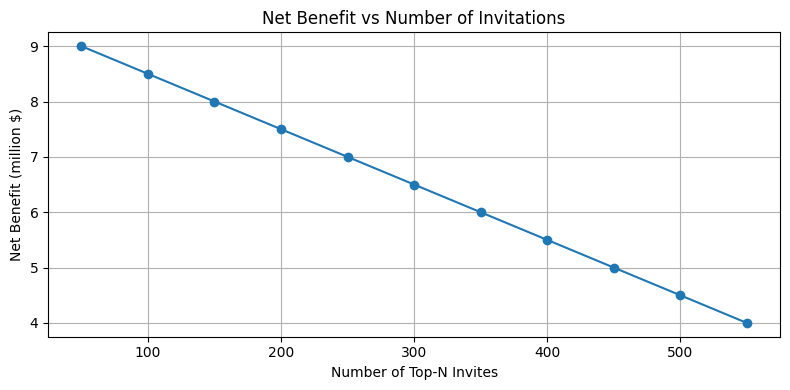

In [ ]:



#  Get draft probabilities
probs = best_rf.predict_proba(X_val)[:, 1]
y_true = y_val.values

#  Define business parameters
invite_cost   = 10_000     # $10k per invited prospect
value_per_draft = 500_000  # $500k benefit per actual draftee

# Simulate for top-N invites
invite_sizes = np.arange(50, 551, 50)
records = []
sorted_idx = np.argsort(probs)[::-1]

for n in invite_sizes:
    idx = sorted_idx[:n]
    tp = y_true[idx].sum()        # true draftees invited
    fp = n - tp                   # false invites
    net = tp*value_per_draft - n*invite_cost
    records.append((n, int(tp), int(fp), net))

#  Build results table
df = pd.DataFrame(records, columns=['Invites','TP','FP','NetBenefit'])
print(df)

#  Plot net benefit curve
plt.figure(figsize=(8,4))
plt.plot(df['Invites'], df['NetBenefit']/1e6, marker='o')
plt.title('Net Benefit vs Number of Invitations')
plt.xlabel('Number of Top-N Invites')
plt.ylabel('Net Benefit (million $)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# <Student to fill this section>
business_impacts_explanations = """
The model's predictions can significantly impact the NBA draft process by enabling teams to identify and invite the most promising college players for trials. By analyzing the net benefit of inviting top-N prospects, teams can optimize their draft strategy, potentially leading to higher success rates in selecting players who will contribute positively to the team. This data-driven approach not only saves costs associated with unnecessary invites but also maximizes the value derived from each drafted player.
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [ ]:
# <Student to fill this section>
experiment_outcome = ""  'Hypothesis Confirmed'""

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [ ]:
# <Student to fill this section>
experiment_results_explanations = """
The experiments conducted confirmed the hypothesis that college performance metrics significantly influence a player's chances of being drafted into the NBA. The Random Forest Classifier, with optimized hyperparameters, achieved an AUROC score of 0.99 on the validation set, indicating a strong predictive capability. This outcome supports the business objective of providing data-driven insights to NBA teams for player selection.
"""

In [ ]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)